In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,
                                zoom_range=0.2,vertical_flip=True,
                                horizontal_flip=True)

In [28]:
#Traning Set
traning_set=train_datagen.flow_from_directory(r'C:\Users\monda\Desktop\cat_and_dog\train',
                                             target_size=(224,224),
                                             class_mode="binary",
                                            batch_size=32)

Found 557 images belonging to 2 classes.


In [29]:
#Test Size
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory(r'C:\Users\monda\Desktop\cat_and_dog\test',
                                         target_size=(224,224),
                                         class_mode='binary',
                                          batch_size=32
                                         )


Found 140 images belonging to 2 classes.


# CNN

In [30]:
##Initalising the CNN
cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',activation='relu',kernel_size=3))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))




In [31]:
cnn.add(tf.keras.layers.Flatten())

In [32]:
cnn.add(tf.keras.layers.Dense(units=256,activation="relu"))

In [33]:
cnn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [34]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 256)              

# Train

In [35]:
cnn.compile(optimizer="adam",loss='binary_crossentropy',metrics=["accuracy"])


In [36]:
history=cnn.fit(x=traning_set,validation_data=test_set,epochs=10)
history

Epoch 1/10
18/18 [==============================] - 26s 1s/step - loss: 1.4766 - accuracy: 0.5458 - val_loss: 0.8640 - val_accuracy: 0.5000
Epoch 2/10
18/18 [==============================] - 27s 2s/step - loss: 0.6827 - accuracy: 0.5978 - val_loss: 0.6975 - val_accuracy: 0.5929
Epoch 3/10
18/18 [==============================] - 32s 2s/step - loss: 0.6597 - accuracy: 0.6302 - val_loss: 0.7420 - val_accuracy: 0.5786
Epoch 4/10
18/18 [==============================] - 31s 2s/step - loss: 0.6643 - accuracy: 0.6391 - val_loss: 0.7666 - val_accuracy: 0.5643
Epoch 5/10
18/18 [==============================] - 33s 2s/step - loss: 0.6463 - accuracy: 0.6212 - val_loss: 0.6828 - val_accuracy: 0.5857
Epoch 6/10
18/18 [==============================] - 33s 2s/step - loss: 0.6487 - accuracy: 0.6266 - val_loss: 0.6729 - val_accuracy: 0.6000
Epoch 7/10
18/18 [==============================] - 30s 2s/step - loss: 0.6642 - accuracy: 0.5907 - val_loss: 0.6878 - val_accuracy: 0.5571
Epoch 8/10
18/18 [==

In [37]:
history.model.save(r"C:\Users\monda\Desktop\Dog recognition\models\model-10.h5")

In [38]:
model=tf.keras.models.load_model(r"C:\Users\monda\Desktop\Dog recognition\models\model-10.h5")

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 256)              

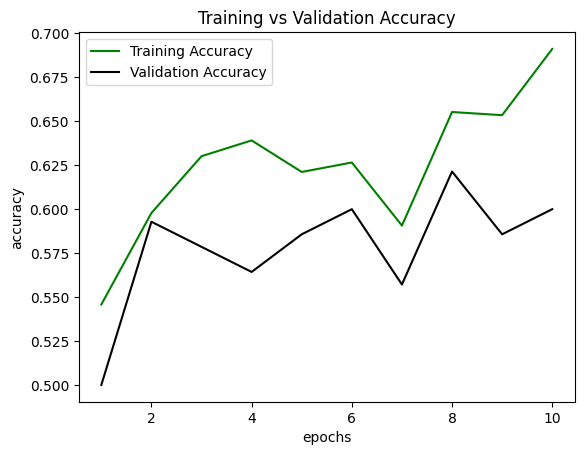

In [40]:
import matplotlib.pyplot as plt
acc_train=history.history["accuracy"]
acc_val=history.history["val_accuracy"]
epochs=range(1,11)
plt.plot(epochs,acc_train,"g",label="Training Accuracy")
plt.plot(epochs,acc_val,"k",label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()


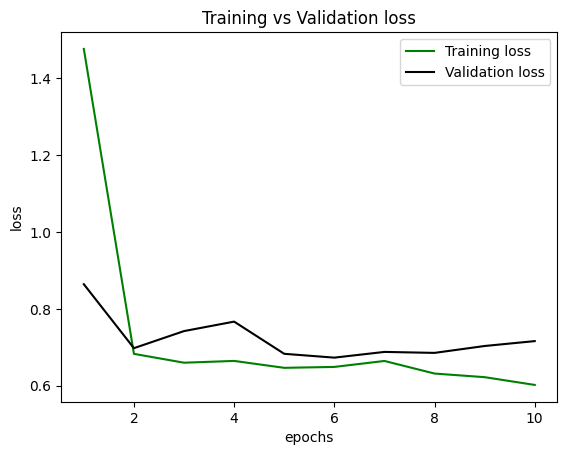

In [41]:
loss_train=history.history["loss"]
loss_val=history.history["val_loss"]
epochs=range(1,11)
plt.plot(epochs,loss_train,"g",label="Training loss")
plt.plot(epochs,loss_val,"k",label="Validation loss")
plt.title("Training vs Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# Testing

In [42]:
import numpy as np
import os
from PIL import Image
from tensorflow.keras.preprocessing import image
import pandas as pd

In [43]:
classes=os.listdir(r"C:\Users\monda\Desktop\Dog recognition\train")
classes

['000bec180eb18c7604dcecc8fe0dba07.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg',
 '00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '002211c81b498ef88e1b40b9abf84e1d.jpg',
 '00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '002a283a315af96eaea0e28e7163b21b.jpg',
 '003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '0042188c895a2f14ef64a918ed9c7b64.jpg',
 '004396df1acd0f1247b740ca2b14616e.jpg',
 '0067dc3eab0b3c3ef0439477624d85d6.jpg',
 '00693b8bc2470375cc744a6391d397ec.jpg',
 '006cc3ddb9dc1bd827479569fcdc52dc.jpg',
 '0075dc49dab4024d12fafe67074d8a81.jpg',
 '00792e341f3c6eb33663e415d0715370.jpg',
 '007b5a16db9d9ff9d7ad39982703e429.jpg',
 '007b8a07882822475a4ce6581e70b1f8.jpg',
 '007ff9a78eba2aebb558afea3a51c469.jpg',
 '008887054b18ba3c7601792b6a453cc3.jpg',
 '008b1271ed1addaccf93783b39deab45.jpg',
 '008ba178d6dfc1a583617470d19c1673.jpg',
 '009509be3ca7cce0ff9e37c8b09b1125.jpg',
 '0097c6242c6f3071762d9f85c3ef1b2f.jpg',
 '00a338a92e4e7b

In [44]:
txt=pd.read_csv(r"C:\Users\monda\Desktop\Dog recognition\labels.csv")

In [45]:
txt

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


1/1 [==============================] - 0s 42ms/step


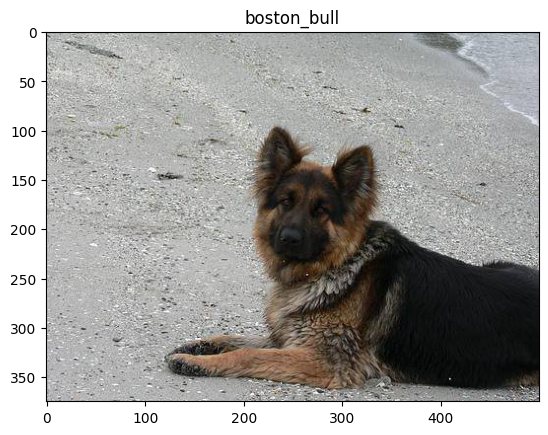

In [52]:
test_image=r"C:\Users\monda\Desktop\Dog recognition\test\00a3edd22dc7859c487a64777fc8d093.jpg"
open_image=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
result=np.argmax(result)
Name=txt.iloc[result]
Name=Name.iloc[1]
plt.imshow(open_image)
plt.title(Name)
plt.show()